In [1]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import numpy as np

In [4]:
file_names = glob.glob('..\\tl_test_images\\*.jpg')

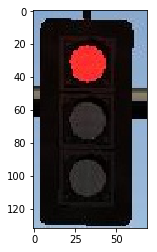

In [6]:
image = cv2.imread(file_names[1])
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure
plt.imshow(image)
plt.show()

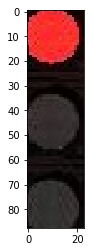

In [11]:
width_to_trim = int(image.shape[1] / 3)
height_to_trim = int(image.shape[0] / 6)
sub_image = image[height_to_trim:(image.shape[0]-height_to_trim), width_to_trim:(image.shape[1]-width_to_trim)]

plt.figure
plt.imshow(sub_image)
plt.show()

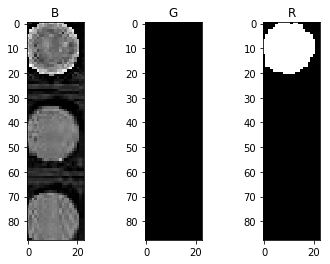

In [22]:
plt.figure()

G_threshold = (200, 255)
R_threshold = (200, 255)

idx = 0
R = sub_image[:,:,0]
G = sub_image[:,:,1]
B = sub_image[:,:,2]

plt.subplot(1, 3, 1)
plt.imshow(B, cmap='gray')
if (idx == 0):
    plt.title("B")

plt.subplot(1, 3, 2)
G_binary = np.zeros_like(G)
G_binary[(G > G_threshold[0]) & (G <= G_threshold[1])] = 1
plt.imshow(G_binary, cmap='gray')
if (idx == 0):
    plt.title("G")

plt.subplot(1, 3, 3)
R_binary = np.zeros_like(G)
R_binary[(R > R_threshold[0]) & (R <= R_threshold[1])] = 1
plt.imshow(R_binary, cmap='gray')
if (idx == 0):
    plt.title("R")
    
plt.show()

In [23]:
R_binary.size

2024

In [27]:
np.sum(R_binary)

344

In [28]:
np.sum(R_binary) / R_binary.size

0.16996047430830039

In [31]:
def tl_light_classifier(image):
    width_to_trim = int(image.shape[1] / 3)
    height_to_trim = int(image.shape[0] / 8)
    sub_image = image[height_to_trim:(image.shape[0]-height_to_trim), width_to_trim:(image.shape[1]-width_to_trim)]
    
    G_threshold = (200, 255)
    R_threshold = (200, 255)
    
    R = sub_image[:,:,0]
    G = sub_image[:,:,1]
    
    G_binary = np.zeros_like(G)
    G_binary[(G > G_threshold[0]) & (G <= G_threshold[1])] = 1
    
    R_binary = np.zeros_like(G)
    R_binary[(R > R_threshold[0]) & (R <= R_threshold[1])] = 1
    
    isRed = (np.sum(R_binary) / R_binary.size) > 0.05
    isGreen = (np.sum(G_binary) / G_binary.size) > 0.05
    
    if isRed and isGreen:
        return 'Yellow'
    elif isRed:
        return 'Red'
    elif isGreen:
        return 'Green'
    else:
        return 'None'

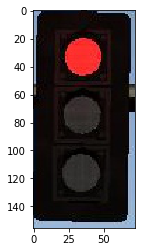

../tl_test_images\tl_image.jpg
Red


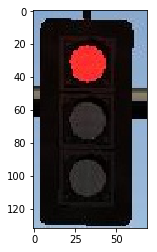

../tl_test_images\tl_image_0.jpg
Red


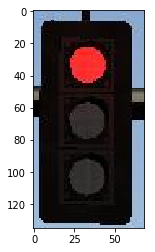

../tl_test_images\tl_image_1.jpg
Red


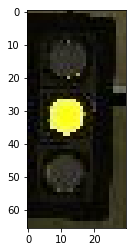

../tl_test_images\tl_image_10.jpg
Yellow


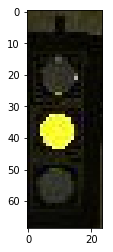

../tl_test_images\tl_image_11.jpg
Yellow


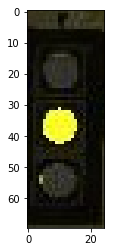

../tl_test_images\tl_image_12.jpg
Yellow


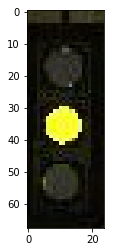

../tl_test_images\tl_image_13.jpg
Yellow


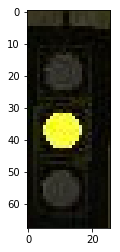

../tl_test_images\tl_image_14.jpg
Yellow


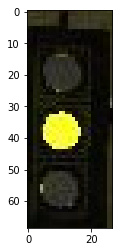

../tl_test_images\tl_image_15.jpg
Yellow


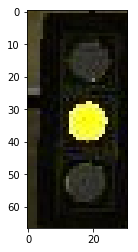

../tl_test_images\tl_image_16.jpg
Yellow


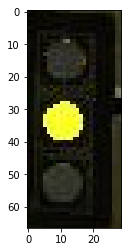

../tl_test_images\tl_image_17.jpg
Yellow


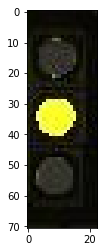

../tl_test_images\tl_image_18.jpg
Yellow


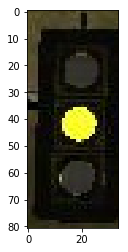

../tl_test_images\tl_image_19.jpg
Yellow


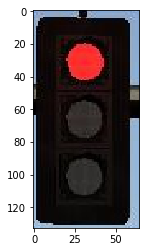

../tl_test_images\tl_image_2.jpg
Red


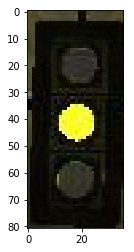

../tl_test_images\tl_image_20.jpg
Yellow


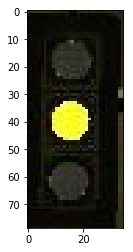

../tl_test_images\tl_image_21.jpg
Yellow


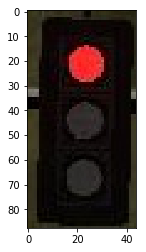

../tl_test_images\tl_image_22.jpg
Red


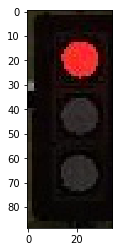

../tl_test_images\tl_image_23.jpg
Red


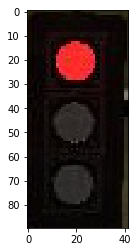

../tl_test_images\tl_image_24.jpg
Red


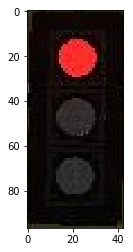

../tl_test_images\tl_image_25.jpg
Red


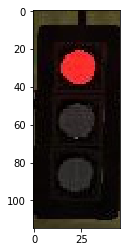

../tl_test_images\tl_image_26.jpg
Red


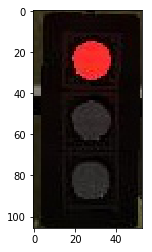

../tl_test_images\tl_image_27.jpg
Red


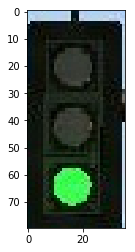

../tl_test_images\tl_image_28.jpg
Green


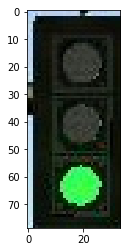

../tl_test_images\tl_image_29.jpg
Green


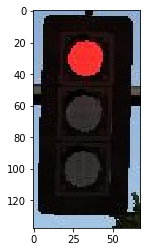

../tl_test_images\tl_image_3.jpg
Red


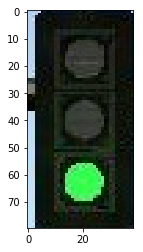

../tl_test_images\tl_image_30.jpg
Green


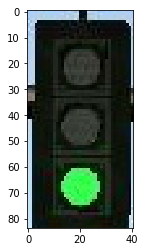

../tl_test_images\tl_image_31.jpg
Green


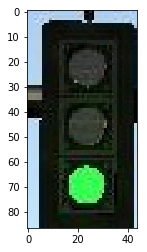

../tl_test_images\tl_image_32.jpg
Green


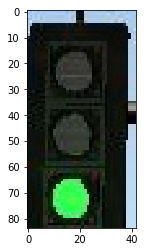

../tl_test_images\tl_image_33.jpg
Green


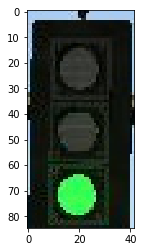

../tl_test_images\tl_image_34.jpg
Green


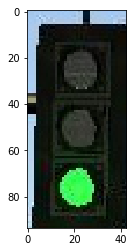

../tl_test_images\tl_image_35.jpg
Green


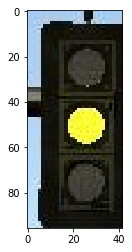

../tl_test_images\tl_image_36.jpg
Yellow


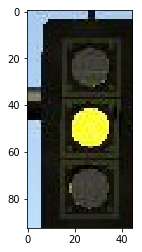

../tl_test_images\tl_image_37.jpg
Yellow


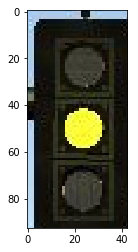

../tl_test_images\tl_image_38.jpg
Yellow


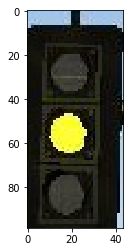

../tl_test_images\tl_image_39.jpg
Yellow


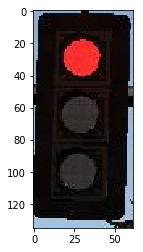

../tl_test_images\tl_image_4.jpg
Red


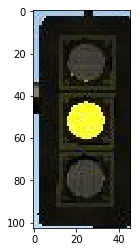

../tl_test_images\tl_image_40.jpg
Yellow


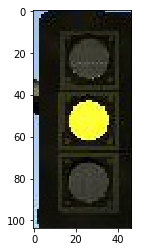

../tl_test_images\tl_image_41.jpg
Yellow


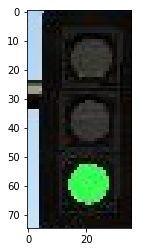

../tl_test_images\tl_image_42.jpg
Green


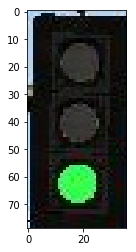

../tl_test_images\tl_image_43.jpg
Green


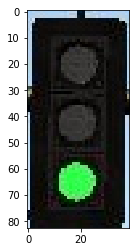

../tl_test_images\tl_image_44.jpg
Green


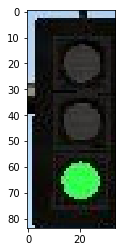

../tl_test_images\tl_image_45.jpg
Green


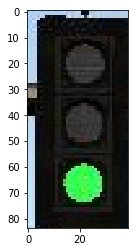

../tl_test_images\tl_image_46.jpg
Green


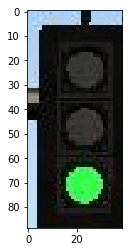

../tl_test_images\tl_image_47.jpg
Green


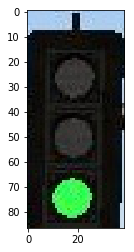

../tl_test_images\tl_image_48.jpg
Green


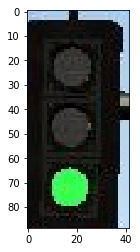

../tl_test_images\tl_image_49.jpg
Green


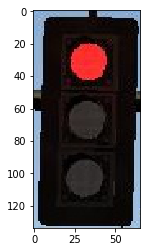

../tl_test_images\tl_image_5.jpg
Red


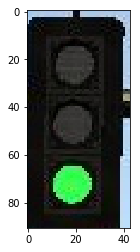

../tl_test_images\tl_image_50.jpg
Green


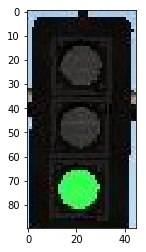

../tl_test_images\tl_image_51.jpg
Green


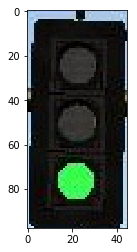

../tl_test_images\tl_image_52.jpg
Green


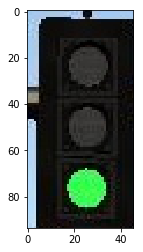

../tl_test_images\tl_image_53.jpg
Green


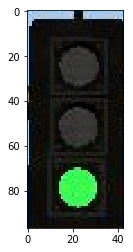

../tl_test_images\tl_image_54.jpg
Green


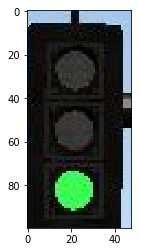

../tl_test_images\tl_image_55.jpg
Green


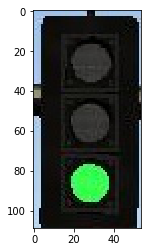

../tl_test_images\tl_image_56.jpg
Green


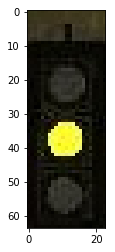

../tl_test_images\tl_image_6.jpg
Yellow


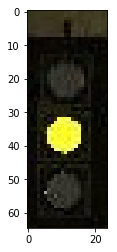

../tl_test_images\tl_image_7.jpg
Yellow


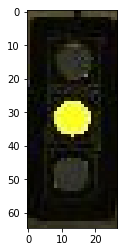

../tl_test_images\tl_image_8.jpg
Yellow


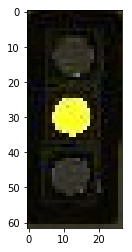

../tl_test_images\tl_image_9.jpg
Yellow


In [32]:
for filename in glob.glob('../tl_test_images/*.jpg'):
    image = cv2.imread(filename)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    plt.figure
    plt.imshow(image)
    plt.show()
    
    print(filename)
    print(tl_light_classifier(image))